# Data Exploring of given dataset 
The machine failure consists of five independent failure modes
1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 to 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tool's rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5.random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail 

In [1]:
#Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
dataset = pd.read_csv('H:/Data Projects/3. Predictive Maintenance dataset/Datasets/ai4i2020.csv',sep='\t')
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

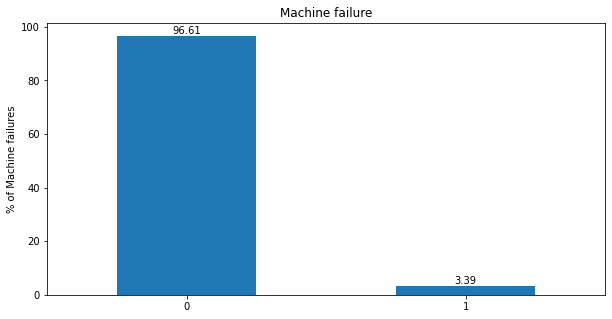

In [4]:
value_counts=(dataset['Machine failure'].value_counts(normalize=True))*100
# plot with annotations is probably easier
p1 = value_counts.plot.bar(figsize=(10,5), ylabel='% of Machine failures', title="Machine failure")
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)
for p in p1.containers:
    p1.bar_label(p, fmt='%.2f', label_type='edge')

**Inference : like in any systems failures tend to occur at lowest percentage of time here it was 3.39%**

In [5]:
#% of different failures that can occur with this system
list_of_failures = ['TWF','HDF','PWF','OSF','RNF']
list_of_value_counts = []
for i in range(len(list_of_failures)):
    value_counts=(dataset[list_of_failures[i]].value_counts(normalize=True))*100
    list_of_value_counts.append(value_counts)
    print('Value Counts of'+ list_of_failures[i],value_counts)

Value Counts ofTWF 0    99.54
1     0.46
Name: TWF, dtype: float64
Value Counts ofHDF 0    98.85
1     1.15
Name: HDF, dtype: float64
Value Counts ofPWF 0    99.05
1     0.95
Name: PWF, dtype: float64
Value Counts ofOSF 0    99.02
1     0.98
Name: OSF, dtype: float64
Value Counts ofRNF 0    99.81
1     0.19
Name: RNF, dtype: float64


## Visualizing % of different failures within this system

<Figure size 2160x2160 with 0 Axes>

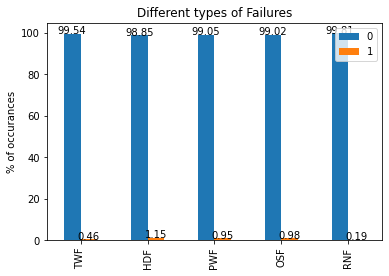

In [6]:
df = pd.DataFrame(list_of_value_counts)
plt.figure(figsize=(30,30))
ax = df.plot(kind='bar')
ax.set_title('Different types of Failures')
ax.set_ylabel('% of occurances')
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    label = "{:.2f}".format(y_value)
    ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0,0),          
            textcoords="offset points", 
            ha='center')                       

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


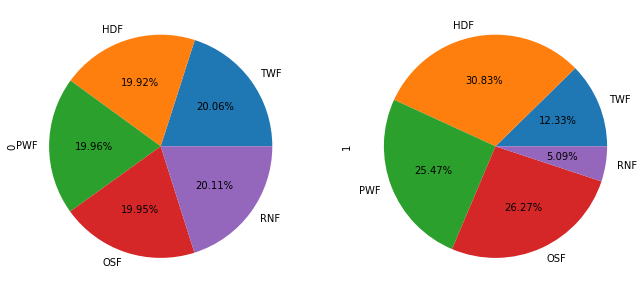

In [7]:
plot = df.plot.pie(subplots=True, figsize=(11, 6),autopct='%.2f%%',legend=False)

**Inference: HDF failure has 30.83% share in other five independent failures had occured, which suggests that either process temperature is not monitored or surrounding temperature has impact on this failure** 

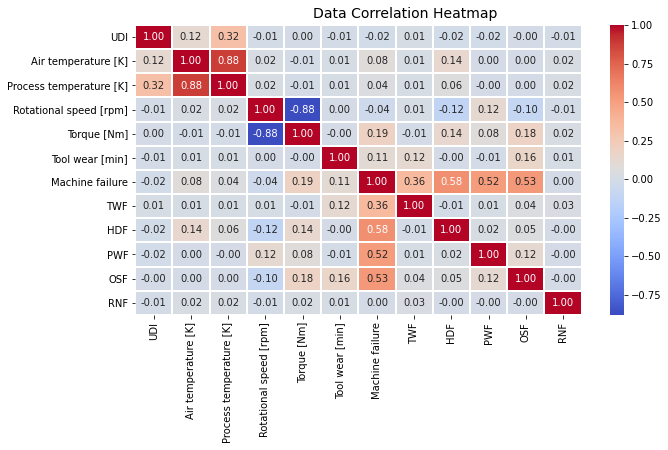

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Correlation Heatmap', fontsize=14)

## Rule based Power Failure mode calculations 

In [9]:
#Power failure mode calculations
dataset['rad/s'] = dataset['Rotational speed [rpm]']*0.10472
dataset['Power'] = dataset['rad/s']*dataset['Torque [Nm]']
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,rad/s,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,162.42072,6951.606816
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,147.44576,6826.738688
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,156.87056,7749.405664
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,150.06376,5927.518520
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,147.44576,5897.830400


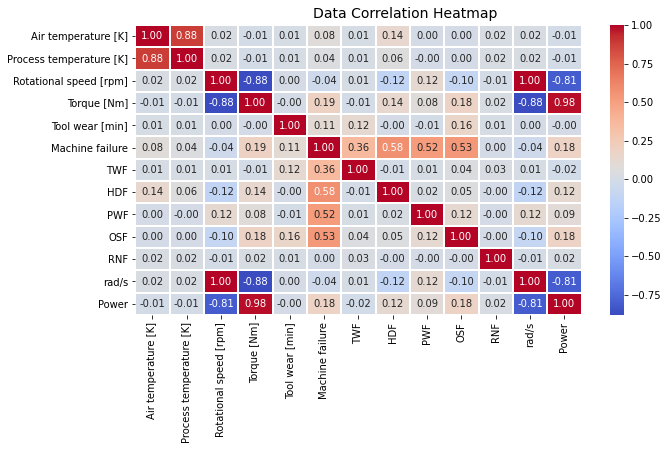

In [10]:
dataset.drop(['UDI','Product ID','Type'],axis=1,inplace=True)
f, ax = plt.subplots(figsize=(10, 5))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Correlation Heatmap', fontsize=14)

In [11]:
dataset.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,rad/s,Power
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,162.42072,6951.606816
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,147.44576,6826.738688
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,156.87056,7749.405664
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,150.06376,5927.518520
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,147.44576,5897.830400


In [12]:
power_failure = dataset[(dataset['Power']<3500) | (dataset['Power']>9000)]
power_failure

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,rad/s,Power
50,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,299.60392,1378.178032
69,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,147.65520,9700.946640
168,298.4,308.3,1433,62.3,20,1,0,0,1,0,0,150.06376,9348.972248
194,298.2,308.5,2678,10.7,86,1,0,0,1,0,0,280.44016,3000.709712
207,298.4,308.7,1421,60.7,119,1,0,0,1,0,0,148.80712,9032.592184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,297.2,307.9,1326,75.4,172,1,0,0,1,1,0,138.85872,10469.947488
9175,297.8,309.0,1403,64.2,0,1,0,0,1,0,0,146.92216,9432.402672
9613,299.0,310.2,1377,62.5,92,1,0,0,1,0,0,144.19944,9012.465000
9764,298.5,309.5,1294,66.7,12,1,0,0,1,0,0,135.50768,9038.362256


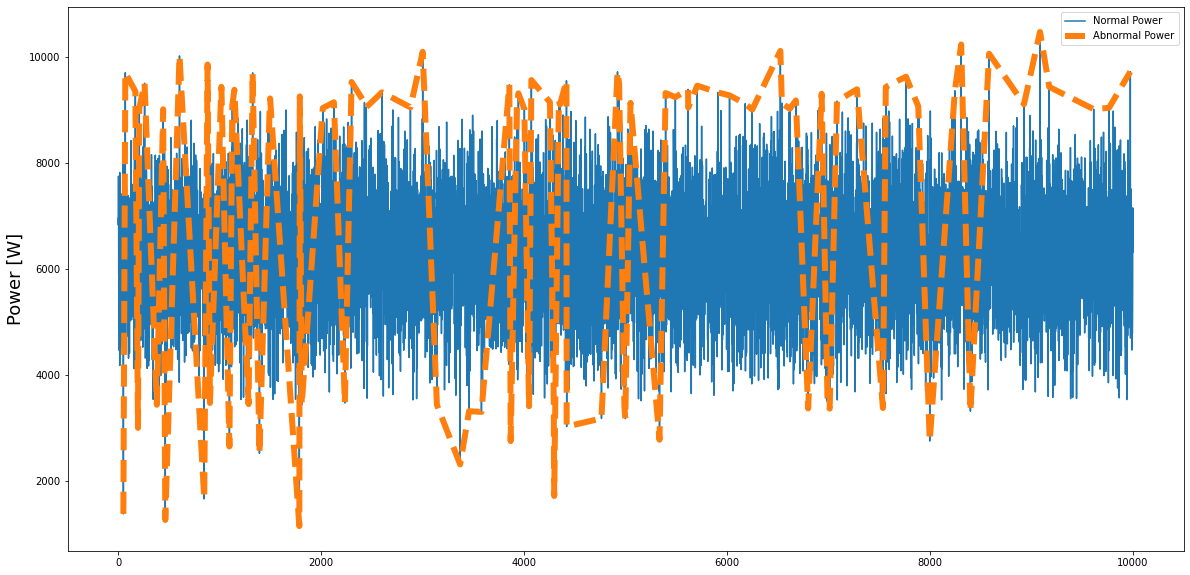

In [13]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Power'],label='Normal Power')
plt.plot(power_failure['Power'],label='Abnormal Power',linestyle='dashed',linewidth=6)
plt.ylabel('Power [W]',fontsize=18)
plt.legend(loc='best')
plt.show()

# Machine Failure status classification

In [14]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['TWF','HDF','PWF','OSF','RNF','rad/s','Power','Machine failure'],axis=1,inplace=False)
y = dataset['Machine failure'].values
#y = y.reshape(-1,1)
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.80,random_state=42)
print('Training Variables Shape:', train_X.shape)
print('Training Target Shape:', train_y.shape)
print('Testing Variables Shape:', test_X.shape)
print('Testing Target Shape:', test_y.shape)

Training Variables Shape: (8000, 5)
Training Target Shape: (8000,)
Testing Variables Shape: (2000, 5)
Testing Target Shape: (2000,)


## Logistic Regression classification

In [15]:
#logistic regression for targets 
from sklearn.linear_model import LogisticRegression 
log_reg=LogisticRegression()
log_reg.fit(train_X,train_y)

LogisticRegression()

In [16]:
pred=log_reg.predict(test_X)
data={'True class':test_y,'Predicted class':pred}
truth_table=pd.DataFrame(data)
truth_table
truth_table.to_excel('Truth_Table.xlsx')

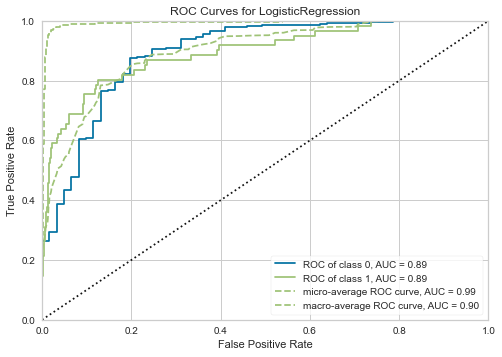

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(log_reg, classes=dataset['Machine failure'].unique())
visualizer.fit(train_X,train_y)        # Fit the training data to the visualizer
visualizer.score(test_X,test_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

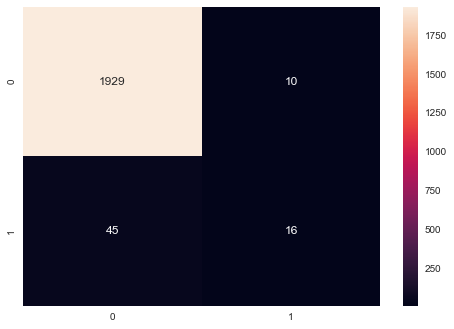

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_y,pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(test_y,pred))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.47')

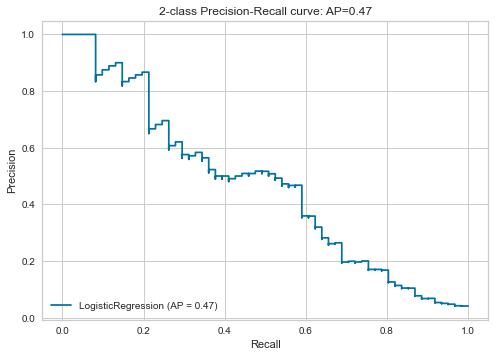

In [19]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
y_score = log_reg.decision_function(test_X)
average_precision = average_precision_score(test_y, y_score)
disp = plot_precision_recall_curve(log_reg,test_X,test_y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

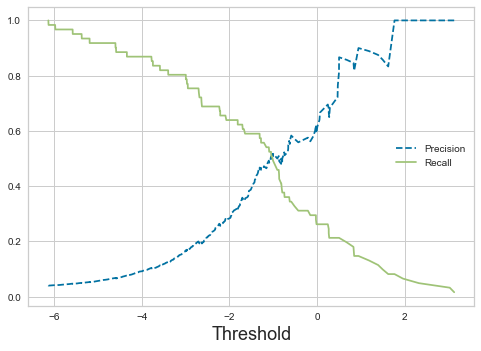

In [20]:
precisions,recalls,thresholds=precision_recall_curve(test_y,y_score)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.legend(loc='best')
    plt.xlabel('Threshold',fontsize=18)
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [21]:
from sklearn.metrics import precision_score,recall_score
pr_logreg=precision_score(test_y,pred)
re_logreg=recall_score(test_y,pred)
print('Precision Score={0:0.2f}'.format(pr_logreg))
print('Recall Score={0:0.2f}'.format(re_logreg))

Precision Score=0.62
Recall Score=0.26


## Random Forest Classifier model for classifiying machine failure

In [22]:
#Hyperparameter tuning of random forest classifier using Grid Search CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
gsc = GridSearchCV(estimator = RandomForestClassifier(),
                   param_grid = {'max_depth':range(3,7),'n_estimators':(10,50,100,1000),},
                   cv = 5,verbose=0,n_jobs=-1)
grid_result = gsc.fit(train_X,train_y)
best_params = grid_result.best_params_
rfr = RandomForestClassifier(max_depth=best_params['max_depth'],
                            n_estimators=best_params['n_estimators'],random_state=False,verbose=False)

In [23]:
best_params

{'max_depth': 6, 'n_estimators': 10}

In [24]:
#Predictions using cross validation
predictions = cross_val_predict(rfr,test_X, test_y, cv=10)

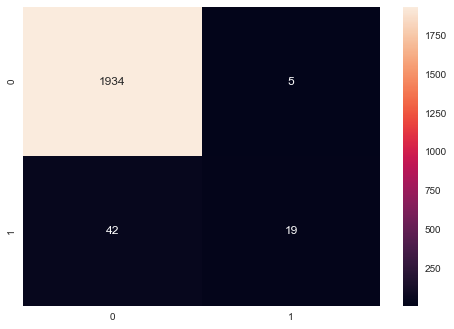

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.79      0.31      0.45        61

    accuracy                           0.98      2000
   macro avg       0.89      0.65      0.72      2000
weighted avg       0.97      0.98      0.97      2000



In [25]:
#Confusion Matrix for rfc
cm = confusion_matrix(test_y,predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(test_y,predictions))

In [26]:
pr_rfc=precision_score(test_y,predictions)
re_rfc=recall_score(test_y,predictions)
print('Precision Score={0:0.2f}'.format(pr_rfc))
print('Recall Score={0:0.2f}'.format(re_rfc))

Precision Score=0.79
Recall Score=0.31


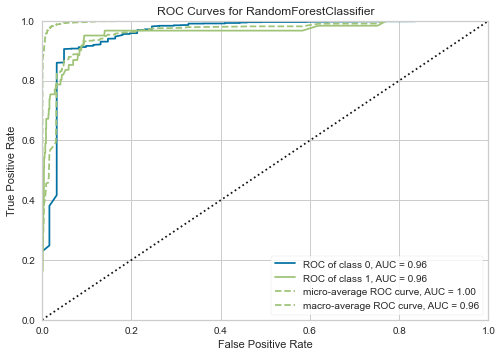

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rfr, classes=dataset['Machine failure'].unique())
visualizer.fit(train_X,train_y)        # Fit the training data to the visualizer
visualizer.score(test_X,test_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

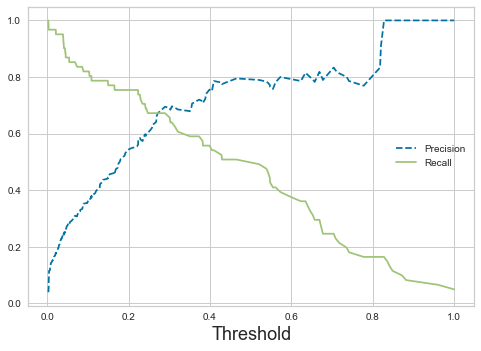

In [28]:
y_score = rfr.predict_proba(test_X)
y_score_rfc = y_score[:,1]
precisions,recalls,thresholds=precision_recall_curve(test_y,y_score_rfc)
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [29]:
y_score

array([[0.99285899, 0.00714101],
       [0.99719482, 0.00280518],
       [0.99657252, 0.00342748],
       ...,
       [0.95826495, 0.04173505],
       [0.        , 1.        ],
       [0.95451903, 0.04548097]])

In [30]:
data={'True class':test_y,'Predicted class':pred,'Probablility for class 0':y_score[:,0],
      'Probablility for class 1':y_score[:,1]}
truth_table=pd.DataFrame(data)
truth_table.to_excel('Probablities_1.xlsx')

In [31]:
test = test_X.iloc[0]

In [32]:
value = test_y[0]
print(value)

0


In [33]:
rfr.predict_proba(test_X)

array([[0.99285899, 0.00714101],
       [0.99719482, 0.00280518],
       [0.99657252, 0.00342748],
       ...,
       [0.95826495, 0.04173505],
       [0.        , 1.        ],
       [0.95451903, 0.04548097]])

# Building Gradio interface 

In [34]:
def predict_failure(air_temp,process_temp,rpm,torque,t_wear):
    df = pd.DataFrame.from_dict({
        'Air temperature [K]': [air_temp], 
        'Process temperature [K]': [process_temp], 
        'Rotational speed [rpm]': [rpm],
        'Torque [Nm]': [torque],
        'Tool wear [min]': [t_wear]
    })
    pred = rfr.predict_proba(df)[0]
    return {'No Machine Failure={0:0.2f}'.format(pred[0]), 'Machine Failure ={0:0.2f}'.format(pred[1])}

In [35]:
import gradio as gr
iface = gr.Interface(predict_failure,
                     title="Detect machine failure for given information",
                     description="Enter the information of the machine with attributes like temperature and torque the model will predict the possible proability of machine failure",
                     inputs=[gr.inputs.Number(label='Air temperature [K]'),
                             gr.inputs.Number(label='Process temperature [K]'),
                             gr.inputs.Number(label='Rotational Speed [rpm]'),
                             gr.inputs.Number(label='Torque [Nm]'),
                             gr.inputs.Number(label='Tool wear[min]')],
                     outputs=gr.outputs.Textbox(label="Machine Fail or not"))

In [38]:
iface.launch(share=True)

Running locally at: http://127.0.0.1:7862/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://14002.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://14002.gradio.app')